# imports:

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import scipy.signal as sig
import numpy as np

In [2]:
!wget https://www.dropbox.com/s/9sakh5x8h1rrrip/HW4.zip

--2022-06-12 17:02:44--  https://www.dropbox.com/s/9sakh5x8h1rrrip/HW4.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9sakh5x8h1rrrip/HW4.zip [following]
--2022-06-12 17:02:44--  https://www.dropbox.com/s/raw/9sakh5x8h1rrrip/HW4.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfbd76959a8a2110b5380cf51b1.dl.dropboxusercontent.com/cd/0/inline/BnFFczq8vwk4enIJDCQWOYPlhyHYopW8U0T_SWUsKHYKRB9FfP3JdnEBmqP3DjybJfOf5MruDAHxinpOGBpyEHWFptnqZp6mYjkfO7iS8PtylXQtoTmCEFgsoigVuskvqCM9vQrIA_VHYOUyt4DEXB1ogQWF0OEpGj6Obvs65_WQdg/file# [following]
--2022-06-12 17:02:44--  https://ucfbd76959a8a2110b5380cf51b1.dl.dropboxusercontent.com/cd/0/inline/BnFFczq8vwk4enIJDCQWOYPlhyHYopW8U0T_SWUsKHYKRB9FfP3JdnEBmqP3DjybJfOf5MruDAHxinpOGBp

In [3]:
import zipfile
with zipfile.ZipFile("HW4.zip","r") as zip_ref:
    zip_ref.extractall("HW4-data")

# Q3

In [4]:
%cd HW4-data

/content/HW4-data


In [5]:
from skimage.data import coins

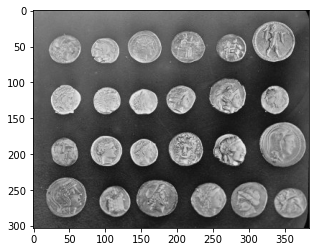

In [6]:
image = coins()
plt.imshow(image, cmap="gray")

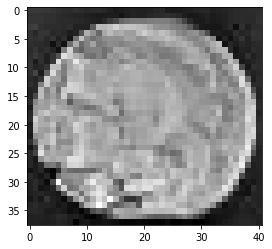

In [7]:
smallCoin = coins()[37:37+38, 80:80+41] 
plt.imshow(smallCoin, cmap="gray")

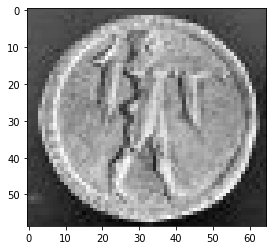

In [8]:
largeCoin = coins()[14:14+59,302:302+65]
plt.imshow(largeCoin, cmap="gray")

**Template Matching**

Your Implementation .Without use Python libraries (skimage , opencv , ...)
find two templates above in the main image. 



In [9]:
def templateMatch(originalimage, template, use_binary=True):
    l = []
    image = np.copy(originalimage)
    if use_binary:
        _,image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    #templates
    if use_binary:
        _,template = cv2.threshold(template, 128, 255, cv2.THRESH_BINARY_INV)
    img_w, img_h = image.shape
    tem_w, tem_h = template.shape
    res_w = img_w - tem_w
    res_h = img_h - tem_h
    result = np.zeros((res_w, res_h))

    for i in range(res_w):
        for j in range(res_h):
            temp_img = image[i:tem_w+i , j:tem_h+j]
            a = np.multiply(temp_img, template)
            result[i][j] = np.sum(a)
    temp = np.argmax(result.reshape(-1))
    x,y = int(temp / result.shape[1]),int(temp % result.shape[1])
    
    image = np.copy(originalimage)
    img = np.array([image.transpose(),image.transpose(),image.transpose()]).transpose()
    for i in range(x,x+tem_w+1):
        for j in [y,y+tem_h]:
            img[i][j][0] = 0
            img[i][j][1] = 0
            img[i][j][2] = 255      
    for i in [x,x+tem_w]:
        for j in range(y,y+tem_h+1):
            img[i][j][0] = 0
            img[i][j][1] = 0
            img[i][j][2] = 255    
    cv2_imshow(img)
    return x,y

show the found matches on coins image.

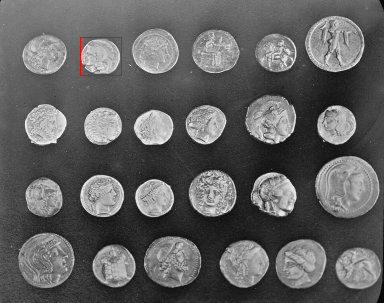

In [10]:
x,y = templateMatch(image, smallCoin)

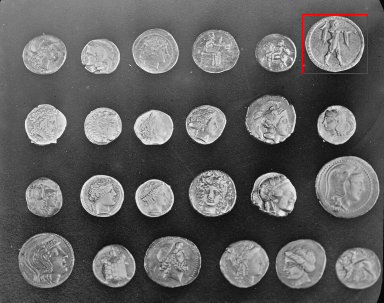

In [11]:
x,y = templateMatch(image, largeCoin)